### House Price Prediction Model With Maching Learning
#### Housing market is a dynamic and complex landscape influenced by a multitude of factors such as economic conditions, interest rates, population growth, and government policies. House price prediction aims to make sense of this ever-changing environment by using data analytics and statistical models to forecast future trends. As market conditions shift rapidly, predicting house prices becomes challenging, requiring a deep understanding of market drivers, localized trends, and historical data. By harnessing modern techniques like machine learning, we can better navigate this complexity, providing valuable insights for buyers, sellers, and investors.

## Introduction
### This project aims to provide a comprehensive analysis of housing price prediction using a housing dataset from Digital Regenesys busines school. By leveraging data-driven insights, we explore the intricacies of the housing market, uncover patterns, and identify key features driving property prices. Through rigorous model evaluation, we aim to develop a robust predictive model for estimating housing prices effectively

## IMPORTING RELEVANT LIBRARIES FOR EDA

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [5]:
# Importing dataset from file
df = pd.read_csv('House_Price_Prediction.csv')

### EXPLORATORY DATA ANALYSIS (EDA)
#### EDA helps us understand the relationships between different features and the target variable (PRICE). 

In [7]:
df.head() # checking the first few rows and colunms of the datasets.

,Unnamed: 0,price,lotsize,bedrooms,bathrms,stories,garagepl,driveway_yes,recroom_yes,fullbase_yes,gashw_yes,airco_yes,prefarea_yes
0,0,42000,8.674197,3,1,2,1,1,0,1,0,0,0
1,1,38500,8.294050,2,1,1,0,1,0,0,0,0,0
2,2,49500,8.026170,3,1,1,0,1,0,0,0,0,0
3,3,60500,8.802372,3,1,2,0,1,1,0,0,0,0
4,4,61000,8.757784,3,1,1,0,1,0,0,0,0,0


In [8]:
df.tail() #Checking the last rows and colunms values of the  datasets.

,Unnamed: 0,price,lotsize,bedrooms,bathrms,stories,garagepl,driveway_yes,recroom_yes,fullbase_yes,gashw_yes,airco_yes,prefarea_yes
546,546,107500,8.699515,3,2,4,1,1,0,0,0,1,0
547,547,108000,8.699515,3,2,3,0,1,0,0,0,1,0
548,548,113750,8.699515,3,1,4,2,1,1,0,0,1,0
549,549,120000,8.853665,3,1,4,2,1,0,0,0,1,0
550,550,70000,9.464983,3,1,1,2,1,0,0,0,0,0


In [9]:
df.info() # Checking the dataset information and datatypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 551 entries, 0 to 550
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    551 non-null    int64  
 1   price         551 non-null    int64  
 2   lotsize       551 non-null    float64
 3   bedrooms      551 non-null    int64  
 4   bathrms       551 non-null    int64  
 5   stories       551 non-null    int64  
 6   garagepl      551 non-null    int64  
 7   driveway_yes  551 non-null    int64  
 8   recroom_yes   551 non-null    int64  
 9   fullbase_yes  551 non-null    int64  
 10  gashw_yes     551 non-null    int64  
 11  airco_yes     551 non-null    int64  
 12  prefarea_yes  551 non-null    int64  
dtypes: float64(1), int64(12)
memory usage: 56.1 KB


In [10]:
df.shape   ## this shows the number of Rows and Colunms of the Datasets 

(551, 13)

In [11]:
df.isna().sum() #This shows if the datasets has null values that will needed to work on.

Unnamed: 0      0
price           0
lotsize         0
bedrooms        0
bathrms         0
stories         0
garagepl        0
driveway_yes    0
recroom_yes     0
fullbase_yes    0
gashw_yes       0
airco_yes       0
prefarea_yes    0
dtype: int64

In [12]:
df.dtypes # Checking the category of Datatypes to know if its eg. int,float or objects

Unnamed: 0        int64
price             int64
lotsize         float64
bedrooms          int64
bathrms           int64
stories           int64
garagepl          int64
driveway_yes      int64
recroom_yes       int64
fullbase_yes      int64
gashw_yes         int64
airco_yes         int64
prefarea_yes      int64
dtype: object

In [13]:
df.describe() # This function help to get the summary of the statistic on the datasets.

,Unnamed: 0,price,lotsize,bedrooms,bathrms,stories,garagepl,driveway_yes,recroom_yes,fullbase_yes,gashw_yes,airco_yes,prefarea_yes
count,551.000000,551.000000,551.000000,551.000000,551.000000,551.000000,551.000000,551.000000,551.000000,551.000000,551.000000,551.000000,551.000000
mean,275.000000,68445.811252,8.470413,2.967332,1.286751,1.820327,0.698730,0.860254,0.177858,0.346642,0.045372,0.321234,0.232305
std,159.204271,26848.486040,0.399086,0.732880,0.502165,0.881334,0.863386,0.347038,0.382741,0.476333,0.208308,0.467375,0.422686
min,0.000000,25000.000000,7.408531,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,137.500000,49500.000000,8.188689,3.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,275.000000,62500.000000,8.433812,3.000000,1.000000,2.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,412.500000,82950.000000,8.757784,3.000000,2.000000,2.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000
max,550.000000,190000.000000,9.692767,6.000000,4.000000,4.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Dropping non relevant colunms

In [15]:
# functions to drop redundant colunms.
df.drop('Unnamed: 0',  axis= 1, inplace = True)
df

,price,lotsize,bedrooms,bathrms,stories,garagepl,driveway_yes,recroom_yes,fullbase_yes,gashw_yes,airco_yes,prefarea_yes
0,42000,8.674197,3,1,2,1,1,0,1,0,0,0
1,38500,8.294050,2,1,1,0,1,0,0,0,0,0
2,49500,8.026170,3,1,1,0,1,0,0,0,0,0
3,60500,8.802372,3,1,2,0,1,1,0,0,0,0
4,61000,8.757784,3,1,1,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
546,107500,8.699515,3,2,4,1,1,0,0,0,1,0
547,108000,8.699515,3,2,3,0,1,0,0,0,1,0
548,113750,8.699515,3,1,4,2,1,1,0,0,1,0
549,120000,8.853665,3,1,4,2,1,0,0,0,1,0


In [16]:
df.describe()

,price,lotsize,bedrooms,bathrms,stories,garagepl,driveway_yes,recroom_yes,fullbase_yes,gashw_yes,airco_yes,prefarea_yes
count,551.000000,551.000000,551.000000,551.000000,551.000000,551.000000,551.000000,551.000000,551.000000,551.000000,551.000000,551.000000
mean,68445.811252,8.470413,2.967332,1.286751,1.820327,0.698730,0.860254,0.177858,0.346642,0.045372,0.321234,0.232305
std,26848.486040,0.399086,0.732880,0.502165,0.881334,0.863386,0.347038,0.382741,0.476333,0.208308,0.467375,0.422686
min,25000.000000,7.408531,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,49500.000000,8.188689,3.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,62500.000000,8.433812,3.000000,1.000000,2.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,82950.000000,8.757784,3.000000,2.000000,2.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000
max,190000.000000,9.692767,6.000000,4.000000,4.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Data Overview
### The dataset used for housing price prediction contains 551 entries with 13 columns. There are numerical columns (Price,area,bedrooms,bathrooms,stories,packing)and 7 Categorical columns (airco,fullbase,recroom,drive way,garageplace,prefare_area,gashal) this datasets has no missing value except for unammed column 0 which has been dropped because its redundant.

In [18]:
#Checking correlation of 5 non categorical variables ('price','lotsize','bedrooms', 'bathrms','stories')

selected_col = df[['price','lotsize','bedrooms', 'bathrms','stories', 'garagepl']]
selected_col.corr()

,price,lotsize,bedrooms,bathrms,stories,garagepl
price,1.000000,0.560017,0.363247,0.513014,0.435332,0.385734
lotsize,0.560017,1.000000,0.151814,0.198791,0.112181,0.365816
bedrooms,0.363247,0.151814,1.000000,0.371325,0.399058,0.136709
bathrms,0.513014,0.198791,0.371325,1.000000,0.322034,0.170263
stories,0.435332,0.112181,0.399058,0.322034,1.000000,0.052983
garagepl,0.385734,0.365816,0.136709,0.170263,0.052983,1.000000


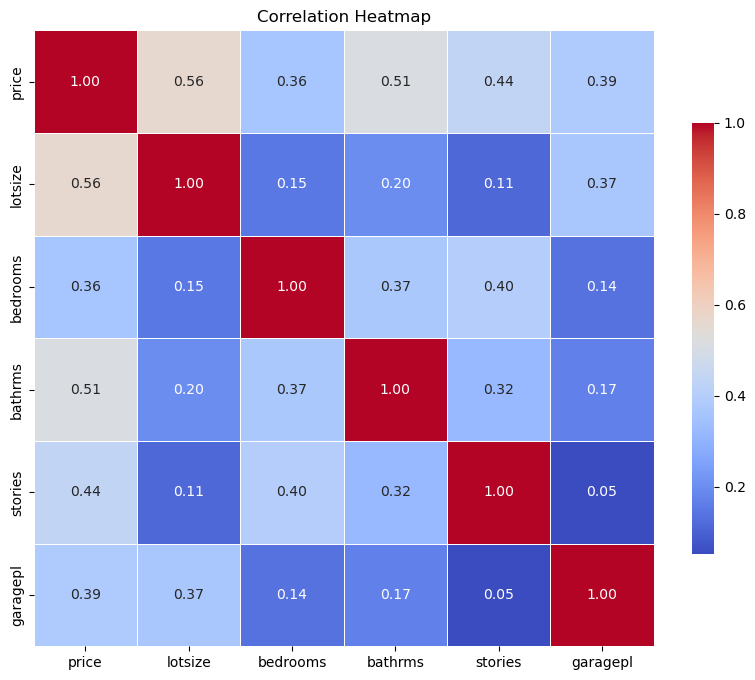

In [19]:
#Visualizing correlation with heatmap

plt.figure(figsize=(10, 8))
corr_matrix=selected_col.corr()
sns.heatmap(corr_matrix,
            cmap= 'coolwarm', 
            annot=True, 
            fmt='.2f', 
            linewidths=0.5, 
            linecolor='w', 
            cbar_kws={'shrink': 0.7})

plt.title('Correlation Heatmap')
plt.show()

### The correlation matrix measures the strength and direction of the linear association between pairs of variables. In this case:
### Price has a moderate positive correlation with lotsize (0.56) and bathrooms (0.51), indicating that larger houses and those with more bathrooms tend to have higher prices.
### The correlation between price and bedrooms is relatively weaker (0.36), suggesting that the number of bedrooms has a less significant impact on the price.
### Similarly, the correlation between price and stories is moderate (0.44), indicating that the number of stories in a house has some influence on the price.
### The correlation between price and garagepl is also moderate (0.39), suggesting that houses with more garage spaces may have slightly higher price

## Checking for outliers

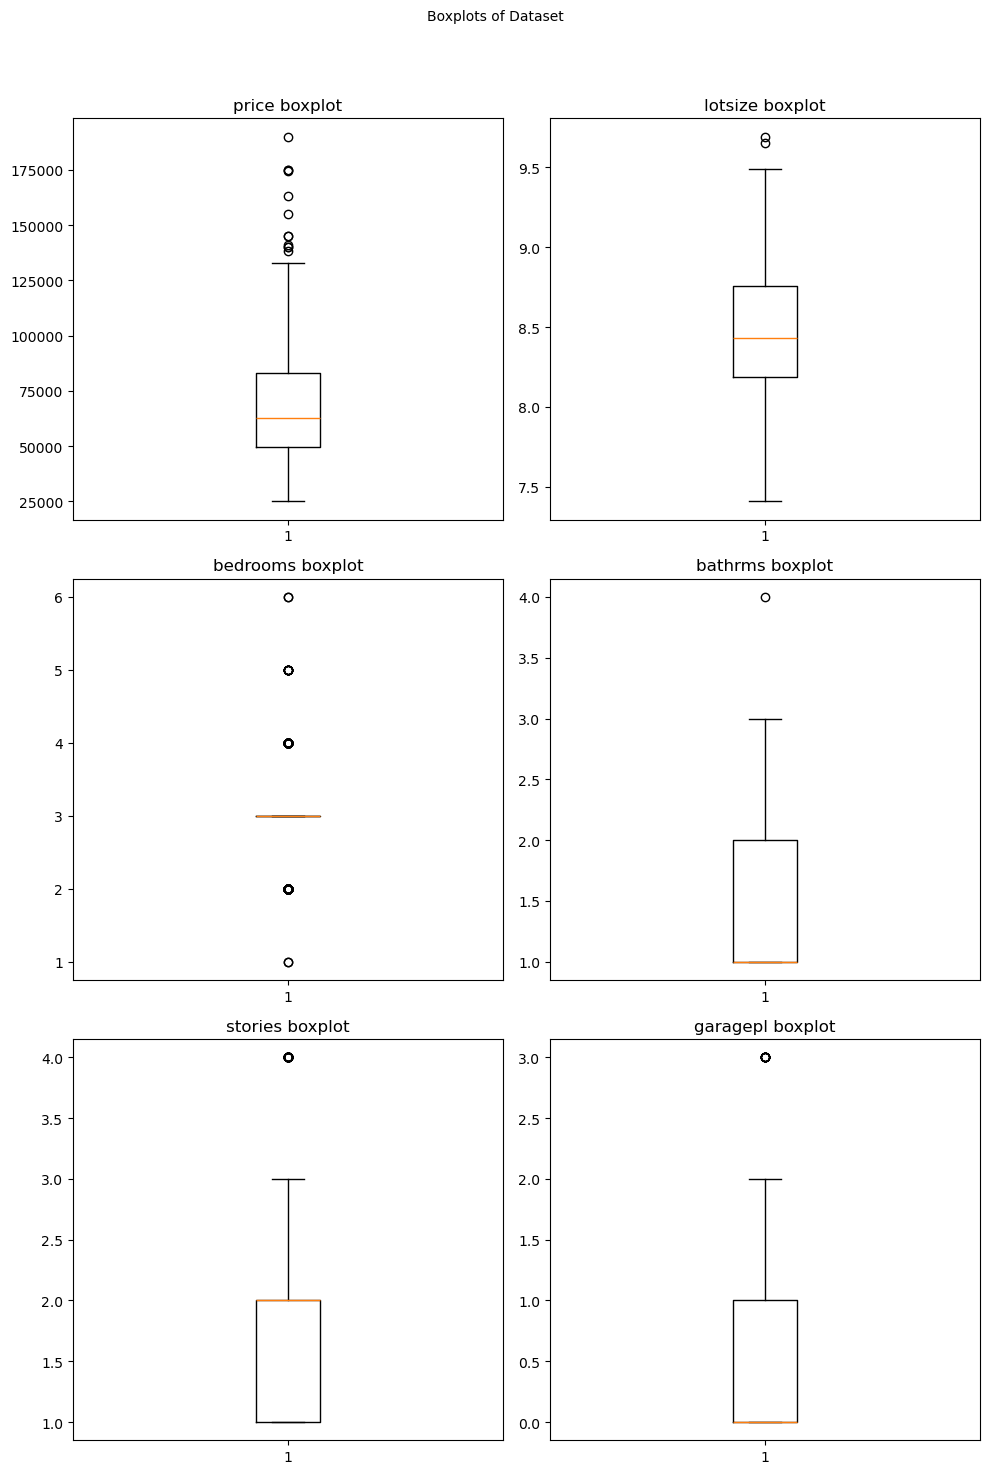

In [22]:
# Populate data_series with data from selected_col
data_series = {}
for data in selected_col:
    data_series[data] = selected_col[data]

# Create subplots
fig, axs = plt.subplots(3, 2, figsize=(10, 15))
fig.suptitle('Boxplots of Dataset', fontsize=10)

axs = axs.flatten()

# Plot each series as a boxplot
for i, (data, series) in enumerate(data_series.items()):
    axs[i].boxplot(series)
    axs[i].set_title(f'{data} boxplot')

plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust layout to fit the title
plt.show()

#### Comments:The above Boxplot shows Some outliers where found. 

In [24]:
q1 = df['price'].quantile(0.25)
q3 = df['price'].quantile(0.75)

iqr = q3 - q1

lower_bound = q1 - 1.5*iqr
upper_bound = q3 + 1.5*iqr

price_lower = df['price'] < lower_bound # price below the 
price_upper = df['price'] > upper_bound

In [25]:
## Summary statistics on outliers to get the max and min of price to create bins
df[price_upper].describe()

,price,lotsize,bedrooms,bathrms,stories,garagepl,driveway_yes,recroom_yes,fullbase_yes,gashw_yes,airco_yes,prefarea_yes
count,12.000000,12.000000,12.000000,12.000000,12.00,12.000000,12.0,12.000000,12.000000,12.000000,12.000000,12.000000
mean,156816.666667,9.047505,3.750000,2.250000,2.50,1.916667,1.0,0.333333,0.583333,0.083333,0.750000,0.666667
std,17976.086809,0.298840,0.621582,0.965307,1.00,0.792961,0.0,0.492366,0.514929,0.288675,0.452267,0.492366
min,138300.000000,8.656955,3.000000,1.000000,1.00,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,140750.000000,8.911934,3.000000,1.750000,2.00,2.000000,1.0,0.000000,0.000000,0.000000,0.750000,0.000000
50%,150000.000000,8.961139,4.000000,2.000000,2.00,2.000000,1.0,0.000000,1.000000,0.000000,1.000000,1.000000
75%,174625.000000,9.126977,4.000000,3.000000,3.25,2.000000,1.0,1.000000,1.000000,0.000000,1.000000,1.000000
max,190000.000000,9.692767,5.000000,4.000000,4.00,3.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000


In [26]:
print(lower_bound)
print(upper_bound)

-675.0
133125.0


In [27]:
df2 = df.copy()

In [28]:
#Define price bins and labels
price_bins = [-675, 44350, 88625, 133125] # Dividing the range into 3 parts
price_labels = ['low', 'Medium', 'High']

#Creating price category column  
df2['price_cat'] = pd.cut(df['price'], bins = price_bins, labels = price_labels, include_lowest=True)

#Define lotsize bins and labels 
lotsize_bins = [0, 7.5, 8.5, 10]
lotsize_labels = ['Small', 'Medium', 'Large']

#Creating a lot size category column
df2['lotsize_cat'] = pd.cut(df['lotsize'], bins = lotsize_bins, labels = lotsize_labels, include_lowest=True)

In [29]:
df2.isna().sum()

price            0
lotsize          0
bedrooms         0
bathrms          0
stories          0
garagepl         0
driveway_yes     0
recroom_yes      0
fullbase_yes     0
gashw_yes        0
airco_yes        0
prefarea_yes     0
price_cat       12
lotsize_cat      0
dtype: int64

In [30]:
df2[df2['price_cat']== 'low']['price'].mean()

37054.05882352941

In [31]:
price_mean=df2[df2['price_cat']== 'High']['price'].mean()

In [32]:
#Replacing vaue above 133125 with mean of high price category
#df.loc[df['price'] >= 133125, 'price'] = mean()
df.loc[df['price'] >= 133125, 'price'].mean()

156816.66666666666

In [33]:
#Using the mean of  price to replace Outliers 
#price_mean = df1[df1['price_cat'] == 'High']['price'].mean()
df2['price_cat'] == 'price_mean'

0      False
1      False
2      False
3      False
4      False
       ...  
546    False
547    False
548    False
549    False
550    False
Name: price_cat, Length: 551, dtype: bool

In [34]:
#Replacing vaue above 133125 with mean of high price category
#df.loc[df['price'] >= 133125, 'price'] = price_mean
df.loc[df['price'] >= 133125, 'price'] = price_mean

C:\Users\hp\AppData\Local\Temp\ipykernel_20060\2564179090.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '106095.12765957447' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[df['price'] >= 133125, 'price'] = price_mean


In [35]:
df.isna().sum()

price           0
lotsize         0
bedrooms        0
bathrms         0
stories         0
garagepl        0
driveway_yes    0
recroom_yes     0
fullbase_yes    0
gashw_yes       0
airco_yes       0
prefarea_yes    0
dtype: int64

{'whiskers': [<matplotlib.lines.Line2D at 0x2a6778ee660>,
 'caps': [<matplotlib.lines.Line2D at 0x2a6778eeba0>,
 'boxes': [<matplotlib.lines.Line2D at 0x2a6778339b0>],
 'medians': [<matplotlib.lines.Line2D at 0x2a6778ef0e0>],
 'fliers': [<matplotlib.lines.Line2D at 0x2a6778ef3e0>],
 'means': []}

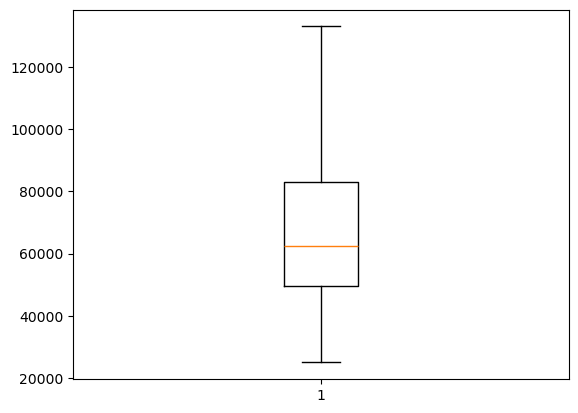

In [36]:
plt.boxplot(df['price']) ## This is to shows that outliers has been filled up.

In [37]:
df.shape

(551, 12)

In [38]:
df.head()

,price,lotsize,bedrooms,bathrms,stories,garagepl,driveway_yes,recroom_yes,fullbase_yes,gashw_yes,airco_yes,prefarea_yes
0,42000.0,8.674197,3,1,2,1,1,0,1,0,0,0
1,38500.0,8.294050,2,1,1,0,1,0,0,0,0,0
2,49500.0,8.026170,3,1,1,0,1,0,0,0,0,0
3,60500.0,8.802372,3,1,2,0,1,1,0,0,0,0
4,61000.0,8.757784,3,1,1,0,1,0,0,0,0,0


In [39]:
## Checking some columns to see Correlations among variables
selected_col =df[['price','garagepl', 'lotsize', 'bedrooms', 'stories','bathrms']]

In [40]:
## Checking correlations
selected_col.corr()

,price,garagepl,lotsize,bedrooms,stories,bathrms
price,1.000000,0.360495,0.561851,0.357268,0.451132,0.483578
garagepl,0.360495,1.000000,0.365816,0.136709,0.052983,0.170263
lotsize,0.561851,0.365816,1.000000,0.151814,0.112181,0.198791
bedrooms,0.357268,0.136709,0.151814,1.000000,0.399058,0.371325
stories,0.451132,0.052983,0.112181,0.399058,1.000000,0.322034
bathrms,0.483578,0.170263,0.198791,0.371325,0.322034,1.000000


## Scaling Variables

In [42]:
## getting variables to scale
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [43]:
#df.iloc[:,1:]= scaler.fit_transform(df.iloc[:,1:])

columns_to_scale = df.columns.to_list()
columns_to_scale

['price',
 'lotsize',
 'bedrooms',
 'bathrms',
 'stories',
 'garagepl',
 'driveway_yes',
 'recroom_yes',
 'fullbase_yes',
 'gashw_yes',
 'airco_yes',
 'prefarea_yes']

In [44]:
scaled_data = scaler.fit_transform(df.iloc[:, 1:])

In [45]:
## creating a dataframe from scaled variables

scaled_df = pd.DataFrame(scaled_data, columns = columns_to_scale[1:])

In [46]:
# Assigning dataset to X and Y
X = scaled_df
y = df['price']

In [47]:
X.head()

,lotsize,bedrooms,bathrms,stories,garagepl,driveway_yes,recroom_yes,fullbase_yes,gashw_yes,airco_yes,prefarea_yes
0,0.511091,0.044615,-0.571549,0.204050,0.349258,0.403047,-0.465119,1.372886,-0.21801,-0.68794,-0.550091
1,-0.442318,-1.321105,-0.571549,-0.931624,-0.810026,0.403047,-0.465119,-0.728392,-0.21801,-0.68794,-0.550091
2,-1.114160,0.044615,-0.571549,-0.931624,-0.810026,0.403047,-0.465119,-0.728392,-0.21801,-0.68794,-0.550091
3,0.832555,0.044615,-0.571549,0.204050,-0.810026,0.403047,2.149988,-0.728392,-0.21801,-0.68794,-0.550091
4,0.720727,0.044615,-0.571549,-0.931624,-0.810026,0.403047,-0.465119,-0.728392,-0.21801,-0.68794,-0.550091


## Linear Regression
### Importing liberaries for Linear Regression Model

In [49]:
#Importing Linear Regression Library and Train_Test_Split library

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [50]:
#splitting datasets into X and Y .Test size = 20% random state = 101.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [51]:
#printing shape of split dataset
split_dataset = [X_train, X_test, y_train, y_test]
dataset_names = ["X_train", "X_test", "y_train", "y_test"]
for name, item in zip(dataset_names, split_dataset):
    print(f"{name}: {item.shape}")

X_train: (440, 11)
X_test: (111, 11)
y_train: (440,)
y_test: (111,)


In [52]:
linreg=LinearRegression()

In [53]:
linreg.fit(X_train, y_train)

LinearRegression()

In [54]:
print(linreg.coef_) 

[7481.61124927 1358.25115475 5201.32950307 5752.97464508 2810.93136754
 1624.92305286 1420.74722311 2016.98429852 2934.49147692 5740.70620069
 3178.69077575]


In [55]:
linreg.score(X_test, y_test)

0.7011685565098538

In [56]:
print (linreg.intercept_)

67859.55804119892


In [57]:
prediction = linreg.predict(X_test)

In [58]:
result = pd.DataFrame({
    'y_test': y_test,
    'prediction':prediction
})
result

,y_test,prediction
220,46000.00000,43373.810535
18,45000.00000,39703.378638
391,94500.00000,101982.803123
141,40000.00000,52493.593997
354,86900.00000,70011.637089
...,...,...
188,50000.00000,53106.432829
361,106095.12766,129036.754701
480,89500.00000,84199.723067
65,60000.00000,70991.889025


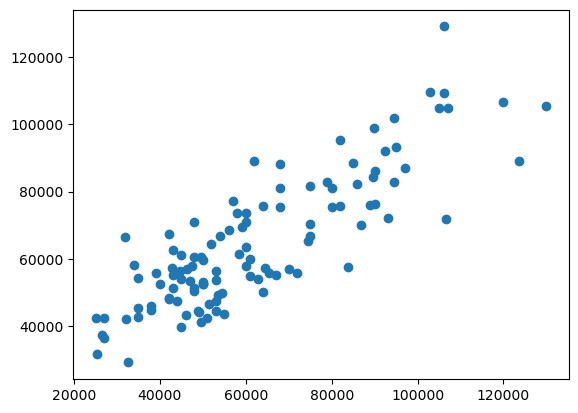

In [59]:
plt.scatter(result['y_test'], result['prediction'])

#### The chart above shows that the model has indicated moderately predictive performance.

In [61]:
from sklearn import metrics as metrics

In [62]:
metrics.mean_absolute_error(y_test, prediction)

10408.343769889576

In [63]:
metrics.mean_squared_error(y_test, prediction)

163162800.6337344

In [64]:
np.sqrt(metrics.mean_squared_error(y_test, prediction))

12773.519508488425

In [65]:
metrics.r2_score(y_test, prediction)

0.7011685565098538

# Model Performance
## The RandomForestRegression Model achieved the following;
### Mean absolute Error (MAE):  10408.343769889576
### Mean Squared Error(MSE):  163162800.6337344
### Root Mean Squared Error(RMSE): 12773.519508488425
## R_squared(R2) Score:  0.7011685565098538
# This indicate moderate predictive Performance.
## Notable Importance:
### The Lotsize of the house is the most influential feature in predicting prices, followed by the number of bathrooms and garageplace.

### The insights gained from this analysis can aid in setting appropriate prices, identifying market trends, and guiding investment strategies. Leveraging advanced machine learning models like the RandomForestRegressor can enhance the accuracy of price predictions and contribute to a better understanding of the dynamic housing market.


# GridSearch CV

In [68]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge, Lasso

In [69]:
    model = []
    scores = []
    parameters =[]

### Model for GridSearchCV

In [71]:
#Ridge
parameters1 = {'alpha': [0.0001, 0.001, 0.01, 0.1]}
c1 = Ridge()

#Lasso
parameters2 = {'alpha': [0.0001, 0.001, 0.01, 0.1]}
c2 = Lasso()

#DecisionTreeRegressor
parameters3 = {'criterion': ['sqaured_error', 'friedman_mse', 'absolute_error'], 'splitter':['best', 'random']}
c3 = DecisionTreeRegressor()

#SupportVectorRegressor
parameters4 = {'C': [0.01, 0.05], 'degree': [2, 3],'gamma':[0.001, 0.01], 'kernel': ['rbf']}
c4 = SVR()

#KNeighborsRegressor
parameters5 = {'n_neighbors': range(30), 'metric':['manhattan','euclidean']}
c5 = KNeighborsRegressor()

#RandomForestRegressor
parameters6 = {'n_estimators':range(1,20),'criterion':['squared_error', 'friedman_mse', 'absolute_error']}
c6 = RandomForestRegressor()

#LinearRegression
parameters7 = {'n_jobs':[None, '-1','1'], 'copy_X': [True, False], 'fit_intercept':[True,False]}
c7 = LinearRegression()


dict_values = {c1:parameters1, c2:parameters2, c3:parameters3,
               c4: parameters4, c5:parameters5,
               c6: parameters6, c7:parameters7}

In [72]:
for key, value in dict_values.items():
    grid = GridSearchCV(key, value, cv=10)
    grid.fit(X,y)
    print(key)
    print(f"best parameter: {grid.best_params_}")
    print(f"best estimator: {grid.best_estimator_}")
    print(f"best score: {grid.best_score_}")
    print('\n')
    model.append(key) # models[c1,c2,c3,c4,c5]
    scores.append(grid.best_score_)
    parameters.append(grid.best_params_)

Ridge()
best parameter: {'alpha': 0.1}
best estimator: Ridge(alpha=0.1)
best score: 0.46550274582428586


Lasso()
best parameter: {'alpha': 0.1}
best estimator: Lasso(alpha=0.1)
best score: 0.4654921519205904




C:\Users\hp\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
20 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\hp\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\hp\anaconda3\Lib\site-packages\sklearn\base.py", line 1467, in wrapper
    estimator._validate_params()
  File "C:\Users\hp\anaconda3\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\hp\anaconda3\Lib\site-packages\sklearn\utils\_

DecisionTreeRegressor()
best parameter: {'criterion': 'friedman_mse', 'splitter': 'random'}
best estimator: DecisionTreeRegressor(criterion='friedman_mse', splitter='random')
best score: -0.038969213448176665


SVR()
best parameter: {'C': 0.05, 'degree': 2, 'gamma': 0.01, 'kernel': 'rbf'}
best estimator: SVR(C=0.05, degree=2, gamma=0.01)
best score: -0.6405202493334688




C:\Users\hp\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
20 fits failed out of a total of 600.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\hp\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\hp\anaconda3\Lib\site-packages\sklearn\base.py", line 1467, in wrapper
    estimator._validate_params()
  File "C:\Users\hp\anaconda3\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\hp\anaconda3\Lib\site-packages\sklearn\utils\

KNeighborsRegressor()
best parameter: {'metric': 'manhattan', 'n_neighbors': 17}
best estimator: KNeighborsRegressor(metric='manhattan', n_neighbors=17)
best score: 0.43094971572842


RandomForestRegressor()
best parameter: {'criterion': 'absolute_error', 'n_estimators': 13}
best estimator: RandomForestRegressor(criterion='absolute_error', n_estimators=13)
best score: 0.3783367375549427


LinearRegression()
best parameter: {'copy_X': True, 'fit_intercept': True, 'n_jobs': None}
best estimator: LinearRegression()
best score: 0.4654903896920245




C:\Users\hp\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
80 fits failed out of a total of 120.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
40 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\hp\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\hp\anaconda3\Lib\site-packages\sklearn\base.py", line 1467, in wrapper
    estimator._validate_params()
  File "C:\Users\hp\anaconda3\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\hp\anaconda3\Lib\site-packages\sklearn\utils\

In [73]:
result = pd.DataFrame({"Model":model, "Score":scores, "Parameters": parameters})
result.index = range(1, len(result)+1)
result

,Model,Score,Parameters
1,Ridge(),0.465503,{'alpha': 0.1}
2,Lasso(),0.465492,{'alpha': 0.1}
3,DecisionTreeRegressor(),-0.038969,"{'criterion': 'friedman_mse', 'splitter': 'ran..."
4,SVR(),-0.640520,"{'C': 0.05, 'degree': 2, 'gamma': 0.01, 'kerne..."
5,KNeighborsRegressor(),0.430950,"{'metric': 'manhattan', 'n_neighbors': 17}"
6,RandomForestRegressor(),0.378337,"{'criterion': 'absolute_error', 'n_estimators'..."
7,LinearRegression(),0.465490,"{'copy_X': True, 'fit_intercept': True, 'n_job..."


#### This parameter shows the results for multiple models, each with their respective scores.

### 1. Score Interpretation:
### The score represents the performance metric of each model, but based on the context, it likely corresponds to R² score (coefficient of determination), which is used to evaluate the accuracy of regression models.
     - R² Score ranges from -∞ to 1:
       - 1: Perfect prediction.
       - 0: Model does no better than predicting the mean.
       - Negative: Worse than predicting the mean.
     - The higher the score, the better the model.

### 2.  Compare Scores:
    SVR (Support Vector Regression) has the highest score of 0.640520, making it the best-performing model in this set.
    Ridge, Lasso, and LinearRegression models have very similar scores around 0.465, suggesting moderate performance.
    DecisionTreeRegressor has the lowest score (0.000289), which indicates it's not performing well on this task.

<h3 style='color:red'> # Comments </h3>
    <h4 style='color:red'> 1)Task 1 (20 marks)  </h4> 
<h5 style='color:blue'> 
    
<br>---Learner has correctly identified the target variable and the feature sets. </br>
<br>---Learner has split the data into train test data correctly.</br>
<br>---Learner has correctly built the linear regression model using the training data. </br>
<br>---Learner has tested the model on test data too.</br>
<br>---Performance of the model is checked using various evaluation metrics like MAE, MSE, RMSE, and R-Squared score.</br>
<br>---Learner has provided relevant comments at relevant places. At line 65, the model used is Linear Regression and not "RandomForestRegressor"</br>
</h5>
<h5 style='color:green'>                                   
    <u> Marks scored:19 </u><br/>
-----------------------------------------------------------------------------------------------------------------------------------------------------------------    
</h5>    
 
<h3 style='color:red'> # Comments </h3>
    <h4 style='color:red'> 2)Task 2 (10 marks)  </h4> 
<h5 style='color:blue'>                                                                                
<br>---Learner has provided the code to build model and applied GridSearchCV for hyperparameter tuning. </br>
<br>---Learner has correctly displayed the results. </br>
<br>---Learner has provided relevant comments at relevant places. </br>


                           
<h5 style='color:green'>                                   
<u> Marks scored:10 </u><br/>
-----------------------------------------------------------------------------------------------------------------------------------------------------------------    
</h5> 
</h5> 